<a href="https://colab.research.google.com/github/leglessbeggar/Statistical-Consulting/blob/main/KModes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files

uploaded = files.upload()
vedas = pd.read_csv("dimeter-mp copy.csv")

Saving dimeter-mp copy.csv to dimeter-mp copy.csv


In [ ]:
vedag = vedas[vedas.Meter == 'G']
vedaa = vedas[vedas.Meter == 'A']

In [ ]:
def meterstanza(veda):
    news = veda["Line"].str.split(pat = ".", expand = True)
    veda = pd.concat([news, veda], axis = 1)
    veda = veda.rename({0:"book", 1: "poem", 2:"stanza"}, axis = 'columns')
    veda["stanza"] = veda["stanza"].str[:-1]
    veda['meter'] = veda[['MP1',"MP2", "MP3", "MP4", "MP5", "MP6", "MP7", "MP8"]].agg("".join, axis = 1)
    veda['code'] = veda['meter'].astype("category").cat.codes
    copy = veda[['code', 'meter']]
    veda = veda.iloc[:,np.r_[0:3, 4,-1]]
    stanza = veda.pivot_table(index  = ["book", "poem", "stanza"], columns = 'Pada', values = 'code').reset_index()
    return([veda, stanza, copy])

In [ ]:
linesg, stanzag, indexg = meterstanza(vedag)
linesa, stanzaa, indexa = meterstanza(vedaa)

In [ ]:
stanzaa.head()

Pada,book,poem,stanza,a,b,c,d,e
0,1,010,01,29.0,38.0,9.0,46.0,NaN
1,1,010,02,9.0,60.0,91.0,38.0,NaN
2,1,010,04,63.0,162.0,80.0,60.0,NaN
3,1,010,05,60.0,70.0,37.0,71.0,NaN
4,1,010,06,127.0,8.0,134.0,48.0,NaN


In [ ]:
linesg.head()

,book,poem,stanza,Pada,code
0,1,001,01,a,66
1,1,001,01,b,39
2,1,001,01,c,10
3,1,001,02,a,14
4,1,001,02,b,66


In [ ]:
stanzag.head()

Pada,book,poem,stanza,a,b,c,d
0,1,001,01,66.0,39.0,10.0,NaN
1,1,001,02,14.0,66.0,116.0,NaN
2,1,001,03,79.0,78.0,172.0,NaN
3,1,001,04,10.0,79.0,120.0,NaN
4,1,001,05,10.0,10.0,10.0,NaN


In [ ]:
three = stanzag.iloc[:,3:6]
stanzag[three.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d
448,10,085,09,43.0,65.0,NaN,185.0
449,10,085,11,13.0,10.0,NaN,170.0
450,10,090,15,14.0,51.0,NaN,130.0
453,10,109,06,120.0,160.0,NaN,66.0
498,10,163,01,3.0,24.0,NaN,23.0
499,10,163,06,NaN,24.0,2.0,185.0


In [ ]:
four = stanzaa.iloc[:,3:7]
stanzaa[four.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d,e
269,10,164,05,99.0,99.0,NaN,13.0,26.0
629,9,112,04,9.0,153.0,NaN,13.0,13.0


In [ ]:
stanzaa.iloc[np.r_[269, 629],5:7] = stanzaa.iloc[np.r_[269, 629],6:8].values
stanzaa[four.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d,e
269,10,164,05,99.0,99.0,13.0,26.0,26.0
629,9,112,04,9.0,153.0,13.0,13.0,13.0


In [ ]:
stanzag.iloc[np.r_[448:451,453,498],5] = stanzag.iloc[np.r_[448:451,453,498],6]
stanzag.iloc[499,3:6] = list(stanzag.iloc[499,4:7])
stanzag[three.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d
448,10,085,09,43.0,65.0,185.0,185.0
449,10,085,11,13.0,10.0,170.0,170.0
450,10,090,15,14.0,51.0,130.0,130.0
453,10,109,06,120.0,160.0,66.0,66.0
498,10,163,01,3.0,24.0,23.0,23.0
499,10,163,06,24.0,2.0,185.0,185.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6146.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 50, cost: 5967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 37, cost: 5995.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


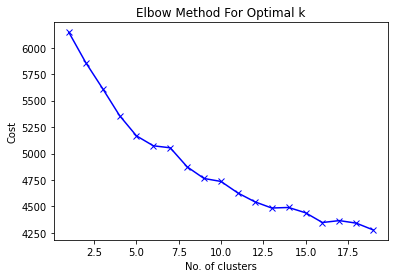

In [ ]:
def Costplot(data, firstpada, lastpada):
  cost = []
  K = range(1,20)
  for num_clusters in list(K):
      kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
      kmode.fit_predict(data.iloc[:,firstpada : lastpada])
      cost.append(kmode.cost_)
  plt.plot(K, cost, 'bx-')
  plt.xlabel('No. of clusters')
  plt.ylabel('Cost')
  plt.title('Elbow Method For Optimal k')
  plt.show()
Costplot(data = stanzag, firstpada = 3, lastpada = 6)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2327.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 2235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 64, cost: 2203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


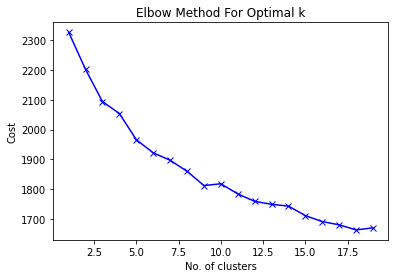

In [ ]:
Costplot(stanzaa, 3, 7)

In [ ]:
kmodea = KModes(n_clusters = 5, init = "random", n_init = 5, verbose = 1)
clustersa = kmodea.fit_predict(stanzaa.iloc[:, 3:7])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 110, cost: 2014.0
Run 1, iteration: 2/100, moves: 5, cost: 2014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 107, cost: 2007.0
Run 2, iteration: 2/100, moves: 40, cost: 1982.0
Run 2, iteration: 3/100, moves: 2, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 206, cost: 1982.0
Run 3, iteration: 2/100, moves: 17, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 109, cost: 1981.0
Run 4, iteration: 2/100, moves: 1, cost: 1981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 114, cost: 2031.0
Best run was number 4


In [ ]:
kmodeg = KModes(n_clusters = 7, init = "random", n_init = 5, verbose = 1)
clustersg = kmodeg.fit_predict(stanzag.iloc[:,3:6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 480, cost: 5107.0
Run 1, iteration: 2/100, moves: 171, cost: 5104.0
Run 1, iteration: 3/100, moves: 145, cost: 5008.0
Run 1, iteration: 4/100, moves: 2, cost: 5008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 460, cost: 5051.0
Run 2, iteration: 2/100, moves: 82, cost: 5051.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 247, cost: 5169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 473, cost: 5008.0
Run 4, iteration: 2/100, moves: 36, cost: 5008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 100, cost: 5031.0
Best run was number 1


In [ ]:
stanzag

Pada,book,poem,stanza,a,b,c,d
0,1,001,01,66.0,39.0,10.0,NaN
1,1,001,02,14.0,66.0,116.0,NaN
2,1,001,03,79.0,78.0,172.0,NaN
3,1,001,04,10.0,79.0,120.0,NaN
4,1,001,05,10.0,10.0,10.0,NaN
...,...,...,...,...,...,...,...
2241,9,067,26,120.0,10.0,10.0,NaN
2242,9,067,28,128.0,66.0,39.0,NaN
2243,9,067,29,196.0,145.0,145.0,NaN
2244,9,101,02,38.0,116.0,66.0,NaN


In [ ]:
kmodeg.cluster_centroids_

array([[ 10.,  10.,  10.],
       [130., 129.,  38.],
       [ 79., 144.,  10.],
       [116., 172., 116.],
       [ 66., 116.,  39.],
       [144., 116.,  10.],
       [ 24., 145., 145.]])

In [ ]:
kmodea.cluster_centroids_

array([[ 99.,   8.,   8.,  99.],
       [ 38.,  38.,   9.,   9.],
       [ 60.,  60., 127., 128.],
       [128.,   9., 128.,  99.],
       [145., 128.,  60., 161.]])

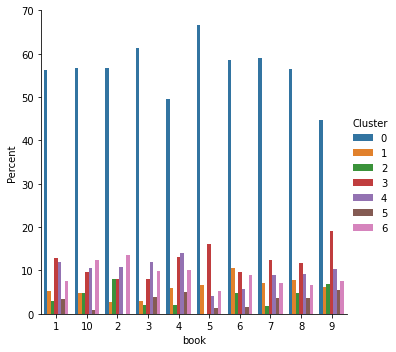

In [ ]:
def plotclusters(stanza, clusterpredictions):
  c = stanza.copy()
  c.insert(0, "Cluster", clusterpredictions, True)
  plotnew = c.groupby("book")["Cluster"].value_counts(normalize=True)
  plotnew = plotnew.mul(100).rename('Percent').reset_index()
  g = sns.catplot(x="book", y='Percent', hue="Cluster", kind='bar', data=plotnew)
plotclusters(stanzag, clustersg)

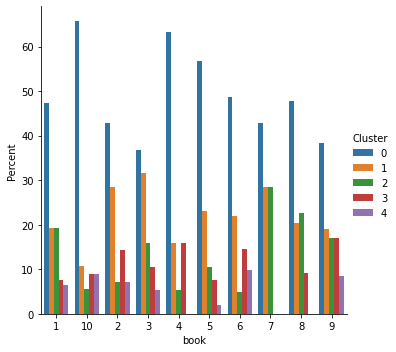

In [ ]:
plotclusters(stanzaa, clustersa)

In [ ]:
indexafin = indexa.groupby(['code', 'meter']).size().reset_index().rename(columns = {0:'count'})
indexafin.to_csv('AnustubhIndex.csv') 
files.download('AnustubhIndex.csv')
indexgfin = indexg.groupby(['code', 'meter']).size().reset_index().rename(columns = {0:'count'})
indexgfin.to_csv('GayatriIndex.csv') 
files.download('GayatriIndex.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>